In [4]:
from fbprophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')  # Hide warnings
import datetime as dt
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import seaborn as sns
import matplotlib.dates as mdates

In [6]:
#getting the stock data using yahoo finance
start = dt.datetime(2010, 1, 1)
end = dt.datetime(2016,1,1)
df = web.DataReader("FB", 'yahoo', start, end)  # Collects data
#prices in USD
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-05-18,45.000000,38.000000,42.049999,38.230000,573576400,38.230000
2012-05-21,36.660000,33.000000,36.529999,34.029999,168192700,34.029999
2012-05-22,33.590000,30.940001,32.610001,31.000000,101786600,31.000000
2012-05-23,32.500000,31.360001,31.370001,32.000000,73600000,32.000000
2012-05-24,33.209999,31.770000,32.950001,33.029999,50237200,33.029999


In [7]:
df.reset_index(inplace=True)
data=df[["Date","Adj Close"]]
data=data.rename(columns={"Date": "ds", "Adj Close": "y"})

#now it is usable for FB Prophet
data.head()

,ds,y
0,2012-05-18,38.230000
1,2012-05-21,34.029999
2,2012-05-22,31.000000
3,2012-05-23,32.000000
4,2012-05-24,33.029999


In [8]:
df_train=data[0:500]
df_test=data[500:911]

In [9]:
m = Prophet()
m.fit(df_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -13.5162


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1124.6     0.0399276        299.42      0.9286      0.9286      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     131       1131.27   0.000919685       229.328   5.047e-06       0.001      194  LS failed, Hessian reset 
     199       1137.54    0.00631288       250.567      0.1272           1      280   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     243       1138.87   0.000394463       128.031   3.847e-06       0.001      413  LS failed, Hessian reset 
     299       1139.56   0.000158335       52.5361           1           1      487   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1139.89   0.000106992       64.9376      0.9181      0.9181      614   
    Iter      log prob        ||dx||      ||grad||       alpha

In [10]:
future = m.make_future_dataframe(periods=411)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
906,2015-06-26,93.960800,60.789759,128.429824
907,2015-06-27,97.449750,62.891288,131.573672
908,2015-06-28,97.518862,63.578881,132.522802
909,2015-06-29,93.796712,59.731582,128.836344
910,2015-06-30,93.969876,59.442688,128.662962


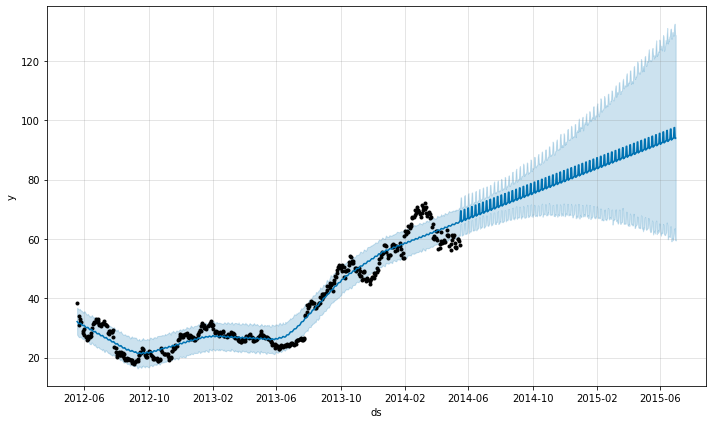

In [11]:
fig1 = m.plot(forecast)